In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def checkTypes(phaseVec, omega):
    if not isinstance(phaseVec, np.ndarray):
        print("The phase vector must be a numpy array.")
        return False
    if not isinstance(omega, np.ndarray):
        print("The angular velocity vector must be a numpy array.")
        return False
    if not phaseVec.shape[0] == 2:
        print("The phase vector must be a 2xN matrix, where N is the number of particles")
        return False
    if not phaseVec.shape[1] == omega.shape[0]:
        print("The number of particles in the phase vector (2xN) and the angular velocity vector (N) don't match.")
        return False
    return True

DEFAULT_OMEGA_0 = 0.10
DEFAULT_ALPHA = 0.005

def setOmega(phaseVec, omega_0 = DEFAULT_OMEGA_0, alpha = DEFAULT_ALPHA):
    J = np.square(phaseVec[0,]) + np.square(phaseVec[1,])
    newOmega  = omega_0 + alpha*J
    return newOmega
    
def recordTurnData(phaseVec, omega, n):
    averagePositionCoords = np.empty(n)
    J = np.empty(n)
    theta = np.empty(n)
    for i in range(0, n):
        averagePositionCoords[i] = np.sum(phaseVec[0,])/phaseVec.shape[1]
        J[i] = np.square(phaseVec[0,0]) + np.square(phaseVec[1,0])
        theta[i] = np.arctan(-phaseVec[1,0]/phaseVec[0,0])
        phaseVec = turn(phaseVec, omega)
    return (phaseVec, averagePositionCoords, J, theta)
    
def plotTurns(phaseVec, omega, n, positionFig, actionFig, thetaFig, startStep=0):
    (phaseVec, averagePositionCoords, J, theta) = recordTurnData(phaseVec, omega, n)
    positionFig.plot(range(startStep, startStep+n), averagePositionCoords, marker='o')
    actionFig.plot(range(startStep, startStep+n), J, marker='o')
    thetaFig.plot(range(startStep, startStep+n), theta, marker='o')
    return phaseVec, averagePositionCoords

def turn(phaseVec, omega, n=1, timestep=1):
    if not checkTypes(phaseVec, omega):
        return
    newPhaseVec =  np.empty((2, phaseVec.shape[1]))
    theta = n*timestep*omega
    newPhaseVec[0,] = np.multiply(np.cos(theta), phaseVec[0,]) - np.multiply(np.sin(theta), phaseVec[1,])
    newPhaseVec[1,] = np.multiply(np.cos(theta), phaseVec[1,]) + np.multiply(np.sin(theta), phaseVec[0,])
    return newPhaseVec
    
def dipoleKick(phaseVec, omega, k, omega_0 = DEFAULT_OMEGA_0, alpha = DEFAULT_ALPHA):
    if not checkTypes(phaseVec, omega):
        return
    newPhaseVec =  np.empty((2, phaseVec.shape[1]))
    newPhaseVec[0,] = phaseVec[0,] + k
    newPhaseVec[1,] = phaseVec[1,]
    newOmega = setOmega(newPhaseVec)
    return (newPhaseVec, newOmega)
    
def quadrapoleKick(phaseVec, omega, k, omega_0 = DEFAULT_OMEGA_0, alpha = DEFAULT_ALPHA): 
    if not checkTypes(phaseVec, omega):
        return
    newPhaseVec =  np.empty((2, phaseVec.shape[1]))
    newPhaseVec[0,] = phaseVec[0,]
    newPhaseVec[1,] = phaseVec[1,] + k*phaseVec[0,]
    newOmega = setOmega(newPhaseVec)
    return (newPhaseVec, newOmega)

def sextapoleKick(phaseVec, omega, k, omega_0 = DEFAULT_OMEGA_0, alpha = DEFAULT_ALPHA): 
    if not checkTypes(phaseVec, omega):
        return
    newPhaseVec =  np.empty((2, phaseVec.shape[1]))
    newPhaseVec[0,] = phaseVec[0,]
    newPhaseVec[1,] = phaseVec[1,] + k*np.square(phaseVec[0,])
    newOmega = setOmega(newPhaseVec)
    return (newPhaseVec, newOmega)

def octapoleKick(phaseVec, omega, k, omega_0 = DEFAULT_OMEGA_0, alpha = DEFAULT_ALPHA): 
    if not checkTypes(phaseVec, omega):
        return
    newPhaseVec =  np.empty((2, phaseVec.shape[1]))
    newPhaseVec[0,] = phaseVec[0,]
    newPhaseVec[1,] = phaseVec[1,] + k*np.power(phaseVec[0,], 3)
    newOmega = setOmega(newPhaseVec)
    return (newPhaseVec, newOmega)

0.05303616752736809
0.02147471436611119


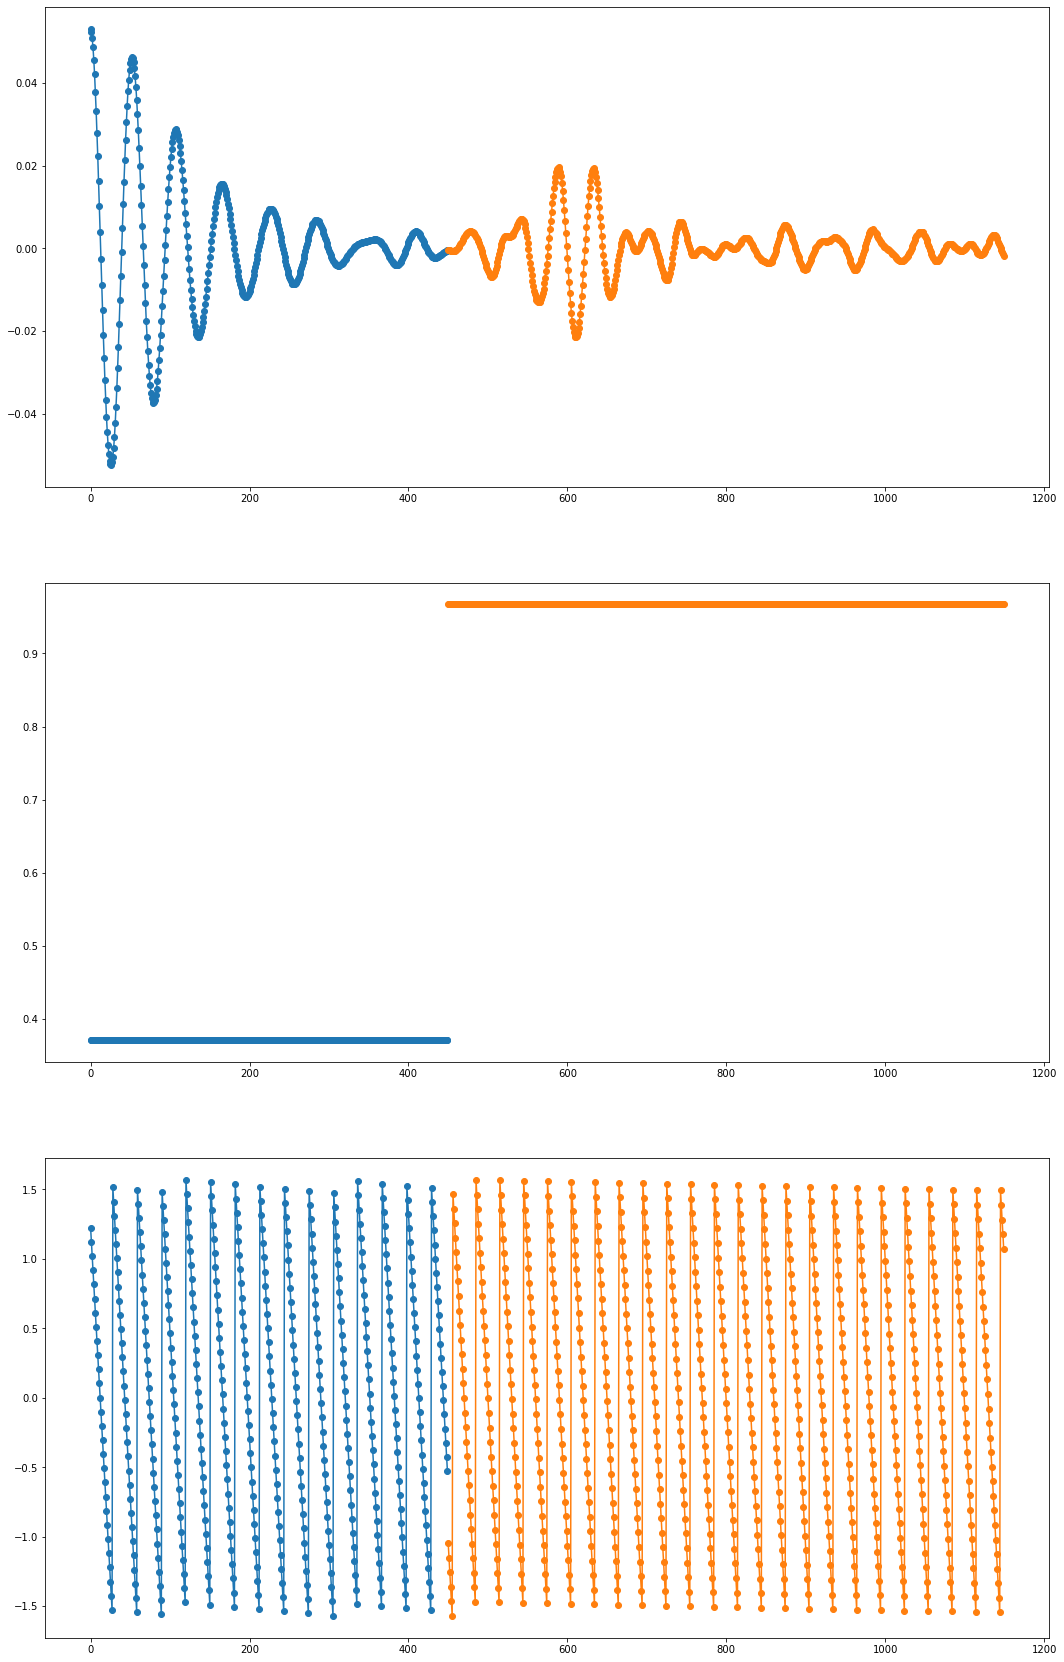

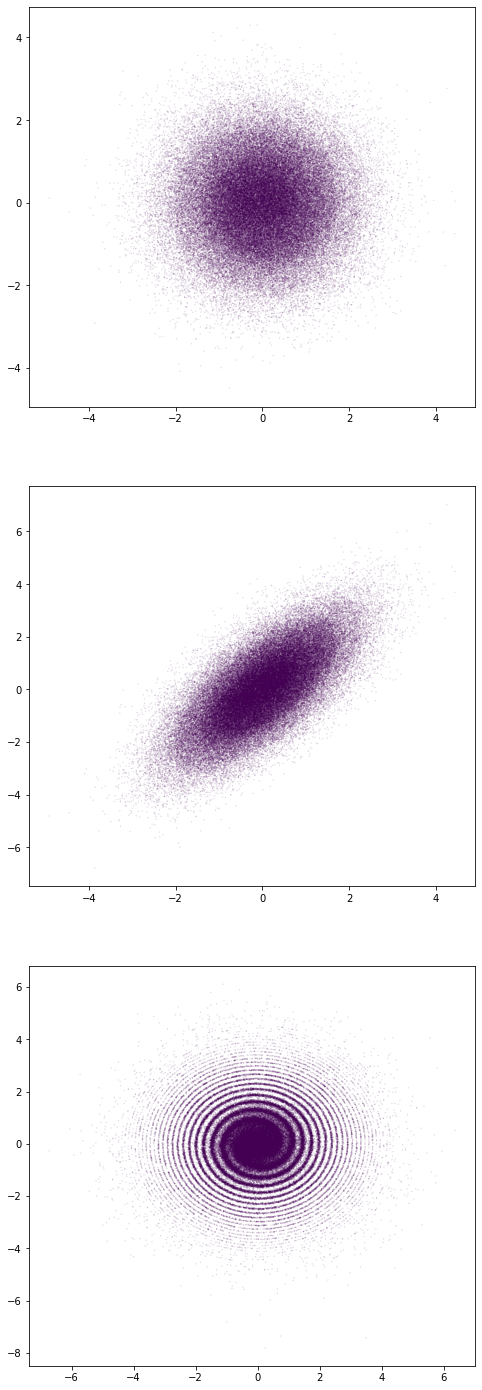

In [50]:
numPoints = 100000
tau = 450

phaseVec = np.empty((2, numPoints))
phaseVec[0,] = np.random.normal(0.05, 1.0, size=(1,numPoints))
phaseVec[1,] = np.random.normal(0.0, 1.0, size=(1,numPoints))
omega = setOmega(phaseVec)
fig, (axPos, axJ, axTheta) = plt.subplots(3,1)
phaseVec, averagePositionCoords = plotTurns(phaseVec, omega, tau, axPos, axJ, axTheta)
print(np.sqrt(np.max(np.square(averagePositionCoords))))
fig2, (ax3, ax4, ax5) = plt.subplots(3,1)
ax3.scatter(phaseVec[0,], phaseVec[1,], marker='o', s=np.full(phaseVec.shape[1], 0.005), c=np.full(phaseVec.shape[1], 0))
(phaseVec, omega) = quadrapoleKick(phaseVec, omega, 1.0)
ax4.scatter(phaseVec[0,], phaseVec[1,], marker='o', s=np.full(phaseVec.shape[1], 0.005), c=np.full(phaseVec.shape[1], 0))
phaseVec, averagePositionCoords = plotTurns(phaseVec, omega, 700, axPos, axJ, axTheta, startStep=tau)
print(np.sqrt(np.max(np.square(averagePositionCoords))))
ax5.scatter(phaseVec[0,], phaseVec[1,], marker='o', s=np.full(phaseVec.shape[1], 0.005), c=np.full(phaseVec.shape[1], 0))
fig.figsize = (10,15)
fig.set_size_inches(18.0, 30.0)
fig2.set_size_inches(8.0, 25.0)
fig.savefig("EchoPlot.pdf")
fig2.savefig("SpiralPlots.pdf")

0.0073082204435407855
0.010034152314211502
0.009594821617060052
0.012819250114087456
0.006787217179937423
0.01724326564864255
0.01829445595535323
0.0147900404560531
0.017296191384388062
0.015813670697773664
0.016221777225272384
0.019576623114303405
0.01963616593384176
0.019421734585878966
0.0174868469303967
0.022559318700151747
0.020299439409406237
0.018115891912292254
0.02533614944013741
0.022588857066927932
0.021702024990846763
0.018415242191071157
0.02313411413354959
0.019437900826605858
0.0189018614209358
0.017055863650035114
0.01745446151939729
0.018880818480553327
0.010754959998348051
0.01681271836278825
0.017292236029113176
0.022279817750422065
0.01786770104551357
0.022595476800258293
0.016976482079587567
0.016332008352746303
0.02197498383341062
0.021371799755525167
0.02027453960788557
0.019660585543263345
0.01825261648238449
0.01833856180588694
0.018103531743592957
0.02337782055703126
0.01566939524473905
0.01365530415049107
0.0203426950631756
0.017401854583916965
0.016153278599

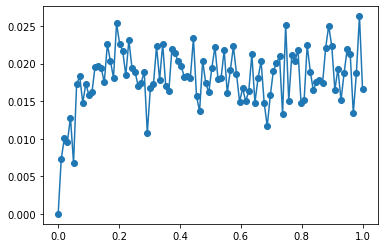

In [49]:
def runEchoSimulation(numPoints, tau, epsilon, Dp, q, omega_0, omega_prime, total_time):
    phaseVec = np.empty((2, numPoints))
    phaseVec[0,] = np.random.normal(Dp, np.sqrt(epsilon), size=(1,numPoints))
    phaseVec[1,] = np.random.normal(0.0, np.sqrt(epsilon), size=(1,numPoints))
    omega = setOmega(phaseVec, omega_0, omega_prime)
    (phaseVec, averagePositionCoords, J, theta) = recordTurnData(phaseVec, omega, tau)
    (phaseVec, omega) = quadrapoleKick(phaseVec, omega, q, omega_0, omega_prime)
    (phaseVec, averagePositionCoords, J, theta) = recordTurnData(phaseVec, omega, total_time - tau)
    echoAmplitude = np.sqrt(np.max(np.square(averagePositionCoords)))
    return echoAmplitude

samples = 100

quad_strength = np.linspace(0.0, 1.0, samples)

amplitude = np.empty(samples)

for i in range(1, samples):
    amplitude[i] = runEchoSimulation(100000, 450, 1.0, 0.05, quad_strength[i], 0.10, 0.005, 1500)
    print(amplitude[i])
    
plt.plot(quad_strength, amplitude, marker='o')

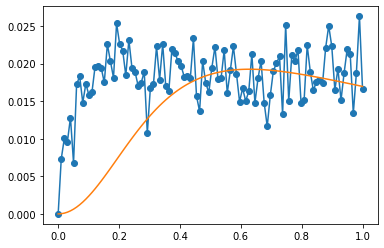

In [53]:
# Q = tau*omega_prime*epsilon*q
Q = 450*1.0*0.005*quad_strength

PredictedAmp = 0.05*np.square(Q)/np.power(1 + np.square(Q), 3.0/2.0)

plt.plot(quad_strength, amplitude, marker='o')
plt.plot(quad_strength, PredictedAmp)

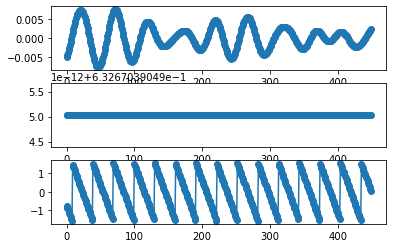

In [12]:
numPoints = 100000
tau = 450

phaseVec = np.empty((2, numPoints))
phaseVec[0,] = np.random.normal(0.0, 1.0, size=(1,numPoints))
phaseVec[1,] = np.random.normal(0.0, 1.0, size=(1,numPoints))

omega = setOmega(phaseVec)
fig, (axPos, axJ, axTheta) = plt.subplots(3,1)
phaseVec = plotTurns(phaseVec, omega, tau, axPos, axJ, axTheta)